**1. Explorer les données, afficher des graphiques des statistiques des données.**

**Données:**

Nous allons utiliser le jeu de données "titanic" qui contient des informations sur les passagers du Titanic. Le fichier CSV peut être téléchargé à partir du lien suivant :

[https://github.com/datasciencedojo/datasets/blob/master/titanic.csv](https://github.com/datasciencedojo/datasets/blob/master/titanic.csv)



|Colonne	|Description	|Type|
|------------|--------------|--------|
|PassengerId	|Identifiant unique du passager	|Numérique|
|Survived	|Indicateur de survie (0 = décédé, 1 = survivant)|	Numérique|
|Pclass	|Classe du passager (1 = première classe, 2 = deuxième classe, 3 = troisième classe)|	Numérique|
|Name	|Nom du passager	|Texte|
|Sex	|Sexe du passager	|Texte|
|Age	|Âge du passager	|Numérique|
|SibSp	|Nombre de frères et sœurs ou conjoints à bord	|Numérique|
|Parch	|Nombre de parents ou enfants à bord	|Numérique|
|Ticket	|Numéro de billet	|Texte|
|Fare	|Prix du billet	|Numérique|
|Cabin	|Cabine du passager	|Texte|
|Embarked	|Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton)	|Texte|

**On doit faire attention aux données catégorielles non binaires**

Si les colonnes ne sont pas supprimées avant il faudra que: 

* PassengerId => supprimé
* Pclass devra être transformé => en catégorie
* Name => supprimé
* sex => en catégorie
* SibSp => en catégorie
* Parch => en catégorie
* Ticket => supprimé
* Cabin => en catégorie
* Embarked => en catégorie


**Code:**

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
# Charger les données
df = pd.read_csv(join("..","data","titanic.csv") )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
# conversion des noms de colonnes en minuscule
df.columns = df.columns.str.lower()
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

# Afficher les statistiques descriptives des données (numérique)
df.describe()


,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


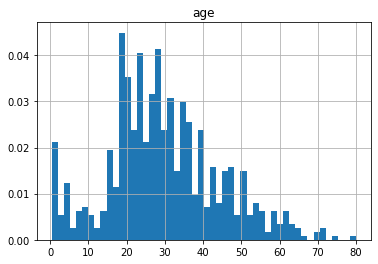

In [5]:

# Afficher un histogramme de la distribution des âges des passagers
plt.hist(df["age"], density=True, bins=50)
plt.grid()
plt.title('age')
plt.show()


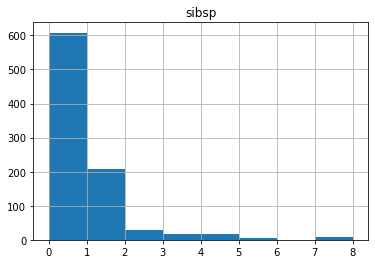

In [6]:
# Afficher un histogramme de la distribution
plt.hist(df["sibsp"],bins=8)
plt.grid()
plt.title('sibsp')
plt.show()

###### on se pose la question de combien il y en a par valeur

In [7]:
df.sibsp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

Visiblement correct

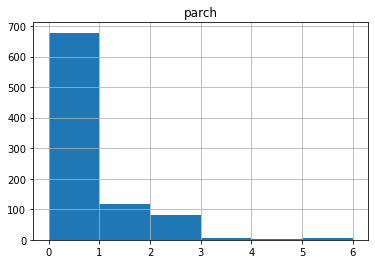

In [8]:
# Afficher un histogramme de la distribution
plt.hist(df["parch"],bins=6)
plt.grid()
plt.title('parch')
plt.show()

In [9]:
df.parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

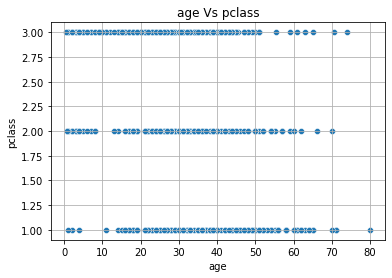

In [10]:

# Afficher un nuage de points de la relation entre l'âge et la classe des passagers
sns.scatterplot(data=df, x="age", y="pclass")
plt.grid()
plt.title('age Vs pclass')
plt.show()
plt.show()


**Commentaires:**

* La fonction `read_csv()` de la bibliothèque Pandas permet de charger un fichier CSV dans un DataFrame.
* La fonction `describe()` renvoie un tableau des statistiques descriptives d'un DataFrame.
* La fonction `hist()` de la bibliothèque Matplotlib permet de tracer un histogramme.
* La fonction `scatterplot()` de la bibliothèque Seaborn permet de tracer un nuage de points.

**2. Trouver les valeurs nulles ou aberrantes, les enlever ou remplacer.**

**Code:**

In [52]:
# Afficher les valeurs nulles dans le DataFrame
df.isnull().sum()


passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [53]:

# Remplacer les valeurs nulles de la colonne "age" par la moyenne de la colonne
df["age"] = df["age"].fillna(df["age"].mean())


In [54]:

# Supprimer les lignes qui contiennent des valeurs nulles dans la colonne "embarked"
df = df.dropna(subset=["embarked"])


**Commentaires:**

* La fonction `isnull()` renvoie un tableau de booléens indiquant si une valeur est nulle ou non.
* La fonction `fillna()` permet de remplacer les valeurs nulles par une valeur donnée.
* La fonction `dropna()` permet de supprimer les lignes qui contiennent des valeurs nulles.

**3. Faire des choix, enlever une colonne qui contient plein de valeur manquante plutôt que d’enlever toutes les lignes qui peuvent avoir des valeurs manquantes.**

**Code:**

In [55]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
# Supprimer la colonne "cabin" car elle contient beaucoup de valeurs nulles
df = df.drop("cabin", axis=1)

# Supprimer la colonne "name" et "passengerid" car elles ne servent à rien pour du ML
df = df.drop(["name","passengerid"], axis=1)

**Commentaires:**

* La fonction `drop()` permet de supprimer une colonne d'un DataFrame.
* L'argument `axis=1` indique qu'il faut supprimer la colonne et non la ligne.


In [16]:
# Afficher les valeurs nulles dans le DataFrame
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

#### On regarde les données non numériques

In [57]:
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [18]:
df.ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '36973', '347088', 'PC 17605', '2661', 'C.A. 29395',
       'S.P. 3464', '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879',
       '2680', '1601', '348123', '349208', '374746', '248738', '364516',
       '345767', '345779', '330932', '113059', 'SO/C 14885', '3101278',
       'W./C

***On se rend bien compte que le ticket n'est pas gérable***

In [58]:
# Supprimer la colonne "cabin" car elle contient beaucoup de valeurs nulles
df = df.drop("ticket", axis=1)

In [20]:
df.sex.unique()

array(['male', 'female'], dtype=object)


**4. Modifier ou tranformer les données**

**Code:**

In [59]:
# Créer une liste des colonnes catégorielles
categorical_columns = ["pclass","sex","sibsp","parch", "embarked"]

# Créer des colonnes hot encoder pour chaque colonne catégorielle
for column in categorical_columns:
    df = pd.get_dummies(df, columns=[column])

# Afficher les 5 premières lignes du DataFrame
df.head()

,survived,age,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,...,parch_0,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_C,embarked_Q,embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


**Autre fonction utiles pour le nettoyage:**

* La fonction `astype()` permet de convertir le type d'une colonne.
* La fonction `cat.codes()` renvoie un tableau des codes des catégories d'une colonne catégorielle.
* La fonction `replace()` permet de remplacer les valeurs d'une colonne par d'autres valeurs.


# Classification des survivants en fonctions des autres données

In [60]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Séparer les données en données d'entraînement, de validation et de test
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["survived"]), df["survived"], test_size=0.2, random_state=42)


In [61]:
df.columns

Index(['survived', 'age', 'fare', 'pclass_1', 'pclass_2', 'pclass_3',
       'sex_female', 'sex_male', 'sibsp_0', 'sibsp_1', 'sibsp_2', 'sibsp_3',
       'sibsp_4', 'sibsp_5', 'sibsp_8', 'parch_0', 'parch_1', 'parch_2',
       'parch_3', 'parch_4', 'parch_5', 'parch_6', 'embarked_C', 'embarked_Q',
       'embarked_S'],
      dtype='object')

In [62]:
X_train.shape

(711, 24)

In [63]:

# Normaliser les données numériques
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
X_train

array([[0.27117366, 0.2958059 , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.36792055, 0.02821272, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.39683338, 0.01546857, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59788892, 0.05061043, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.25860769, 0.06709553, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.40939935, 0.01689187, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [69]:
import time

# get the start time

# Entraîner un modèle de régression logistique
malist = ["lbfgs", "liblinear", "newton-cg", "sag", "saga"]

for mod in malist:
    st = time.time()
    model = LogisticRegression(solver=mod, max_iter=1000)
    et = time.time()
    model.fit(X_train, y_train)
    print(et-st,mod,model.score(X_test, y_test)) 


0.0005118846893310547 lbfgs 0.8146067415730337
1.5974044799804688e-05 liblinear 0.8146067415730337
1.2874603271484375e-05 newton-cg 0.8146067415730337
1.0013580322265625e-05 sag 0.8146067415730337
1.52587890625e-05 saga 0.8146067415730337


In [42]:

# Évaluer le modèle sur les données de validation
scores = cross_validate(model, X_train, y_train, cv=5, scoring="accuracy")
print("Accuracy sur les données de validation :", scores["test_score"].mean())


Accuracy sur les données de validation : 0.7906628582684921


In [64]:

# Recherche d'hyperparamètres
parameters = {"C": np.arange(0.1, 10, 0.1)}
grid_search = GridSearchCV(model, parameters, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_model = grid_search.best_estimator_

# Évaluer le meilleur modèle sur les données de test
print("Accuracy sur les données de test :", best_model.score(X_test, y_test))


Accuracy sur les données de test : 0.8146067415730337


In [65]:

# Importance des features
feature_importances = best_model.coef_.ravel()
print("Importance des features :", feature_importances)

Importance des features : [-2.57599513  0.35719772  1.00878909  0.04437579 -1.06392256  1.31718997
 -1.32794766  1.12920352  1.26159786  0.66734124 -1.03553596 -0.70690502
 -0.3485281  -0.97793121  0.38669558  0.952661    0.55635346  0.41836024
 -0.95496677 -0.85492717 -0.51493403  0.15827519  0.1521757  -0.32120858]


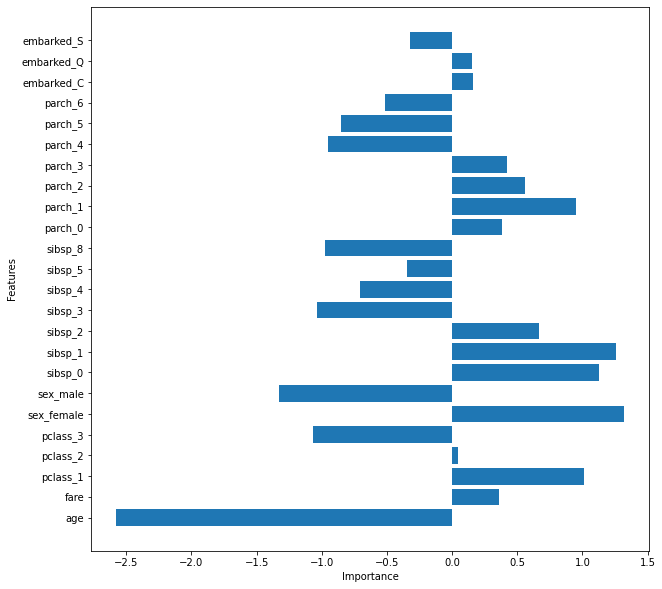

In [66]:
# Importance des features
feature_importances = best_model.coef_.ravel()

# Plot des features importances en transposé
plt.figure(figsize=(10, 10))
plt.barh(df.drop(columns=["survived"]).columns, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

> L'importance positive d'une feature indique que cette feature est corrélée positivement avec la variable cible. Cela signifie que les valeurs élevées de la feature sont associées à des valeurs élevées de la variable cible.

> L'importance négative d'une feature indique que cette feature est corrélée négativement avec la variable cible. Cela signifie que les valeurs élevées de la feature sont associées à des valeurs faibles de la variable cible.

> Par exemple, dans le cas du jeu de données Titanic, la feature "sex" est une feature positive. Les femmes ont plus de chances de survivre que les hommes. La feature "age" est également une feature positive. Les enfants ont plus de chances de survivre que les adultes.

> La feature "embarked" est une feature négative. Les passagers qui ont embarqué à Southampton ont moins de chances de survivre que les passagers qui ont embarqué à Cherbourg ou à Queenstown.

> Il est important de noter que l'importance d'une feature n'est pas une mesure absolue. Elle est relative à l'importance des autres features. Par exemple, dans le cas du jeu de données Titanic, la feature "sex" est beaucoup plus importante que la feature "embarked".

#### Matrice de confusion

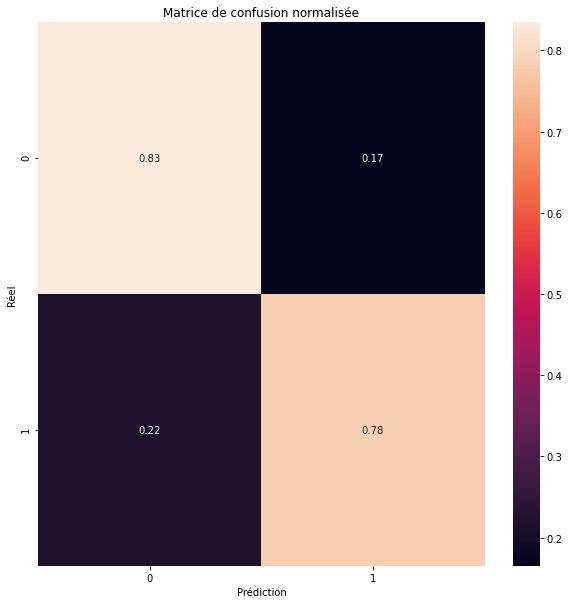

In [67]:
# Prédictions sur les données de test
y_pred = best_model.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Normaliser la matrice de confusion
cm_norm = cm / cm.sum(axis=1, keepdims=True)

# Afficher la matrice de confusion sous forme de heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm_norm, annot=True, fmt=".2f", ax=ax)
plt.title("Matrice de confusion normalisée")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()

In [68]:
# Calculer le rapport de classification
report = classification_report(y_test, y_pred, target_names=["Survivant", "Non-survivant"])

# Afficher le rapport de classification
print(report)

               precision    recall  f1-score   support

    Survivant       0.86      0.83      0.85       109
Non-survivant       0.75      0.78      0.77        69

     accuracy                           0.81       178
    macro avg       0.80      0.81      0.81       178
 weighted avg       0.82      0.81      0.82       178



# Résultats avec moins de traitement sur les données

               precision    recall  f1-score   support

    Survivant       0.83      0.86      0.84       105
Non-survivant       0.79      0.74      0.76        74

     accuracy                           0.81       179
    macro avg       0.81      0.80      0.80       179
 weighted avg       0.81      0.81      0.81       179



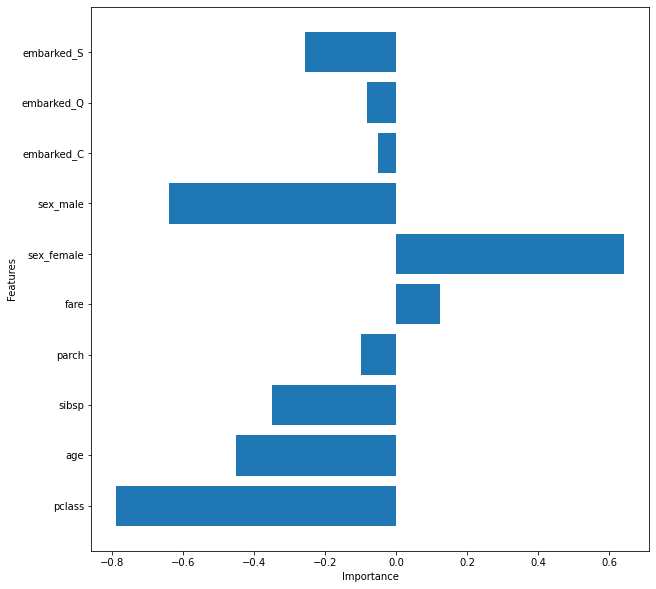

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from os.path import join
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Charger les données
df = pd.read_csv(join("..","data","titanic.csv") )

# conversion des noms de colonnes en minuscule
df.columns = df.columns.str.lower()

# Supprimer les colonnes inutiles
df = df.drop(["name", "passengerid", "cabin", "ticket"], axis=1)

# Créer des colonnes hot encoder pour les données catégorielles
categorical_columns = ["sex", "embarked"]
for column in categorical_columns:
    df = pd.get_dummies(df, columns=[column])

# Séparer les données en données d'entraînement, de validation et de test
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["survived"]), df["survived"], test_size=0.2, random_state=42)

# Normaliser les données numériques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Imputer les valeurs manquantes
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Entraîner un modèle de régression logistique
model = LogisticRegression(solver="lbfgs", max_iter=1000)
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Calculer le rapport de classification
report = classification_report(y_test, y_pred, target_names=["Survivant", "Non-survivant"])

# Afficher le rapport de classification
print(report)

# Importance des features
feature_importances = model.coef_.ravel()

# Plot des features importances en transposé
plt.figure(figsize=(10, 10))
plt.barh(df.drop(columns=["survived"]).columns, feature_importances)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


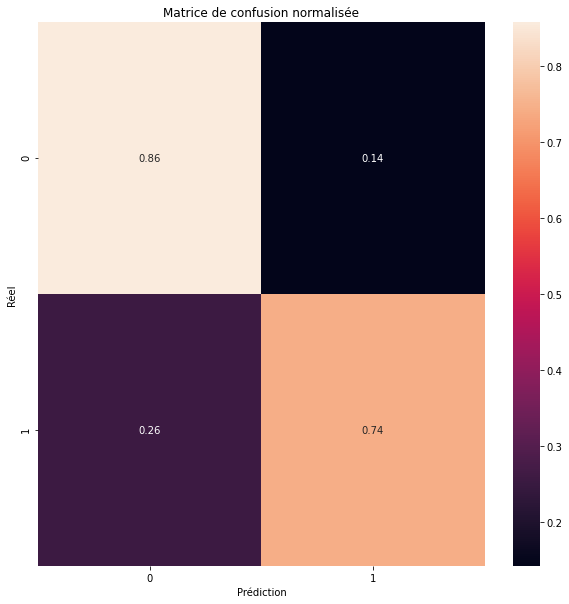

In [33]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Normaliser la matrice de confusion
cm_norm = cm / cm.sum(axis=1, keepdims=True)

# Afficher la matrice de confusion sous forme de heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm_norm, annot=True, fmt=".2f", ax=ax)
plt.title("Matrice de confusion normalisée")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()